## Import libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv("/Users/melisandecornetlichtfus/Desktop/Formation/DATA_python/train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Text(0, 0.5, '')

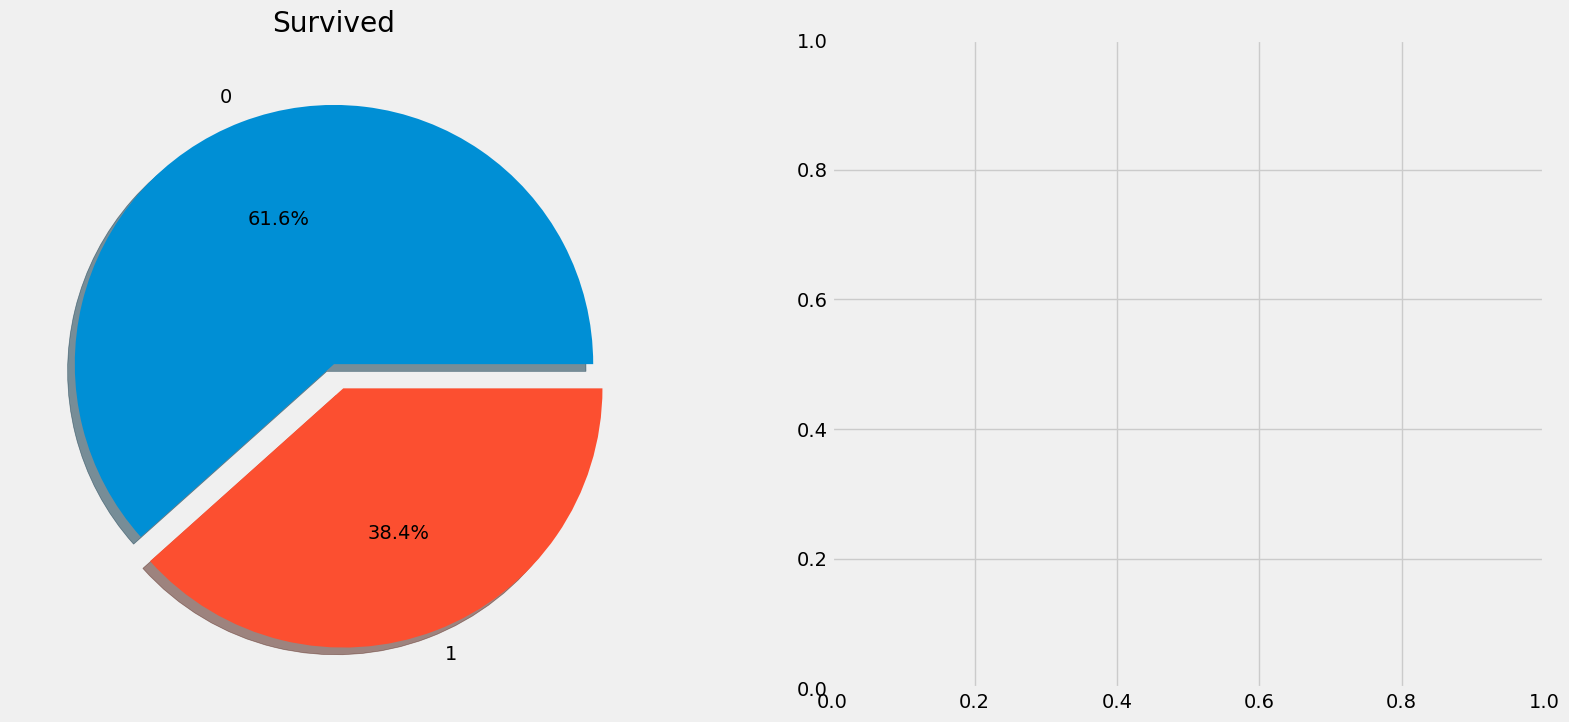

In [6]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')


<Axes: xlabel='Survived', ylabel='count'>

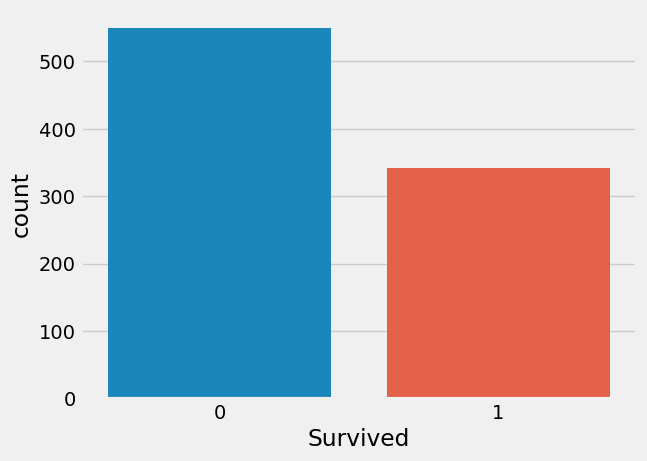

In [7]:
sns.countplot(data=data,x="Survived")

<Axes: xlabel='Sex'>

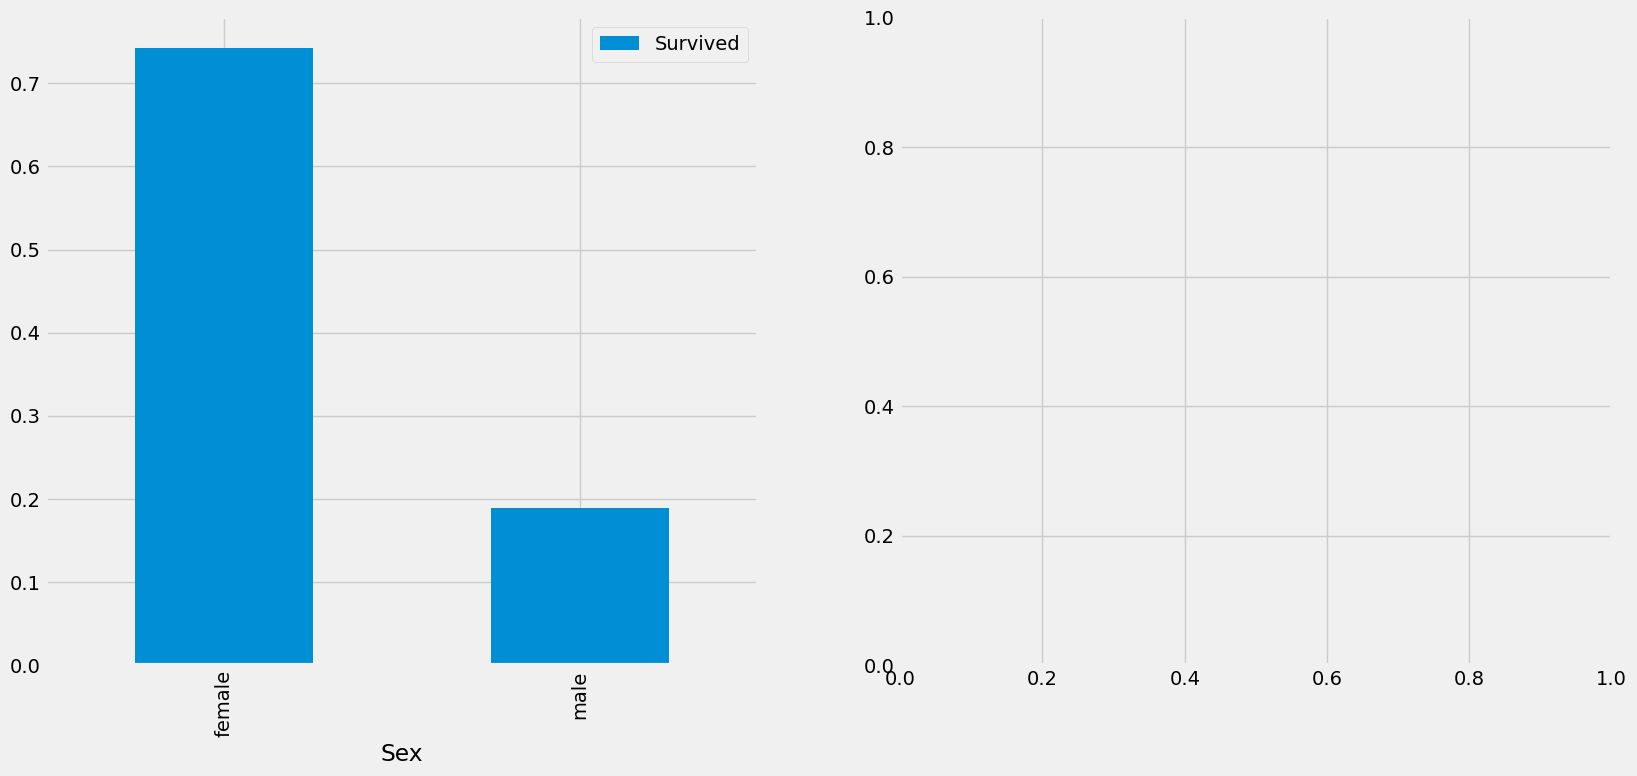

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])

In [9]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 1.0, 'Survived= 0')

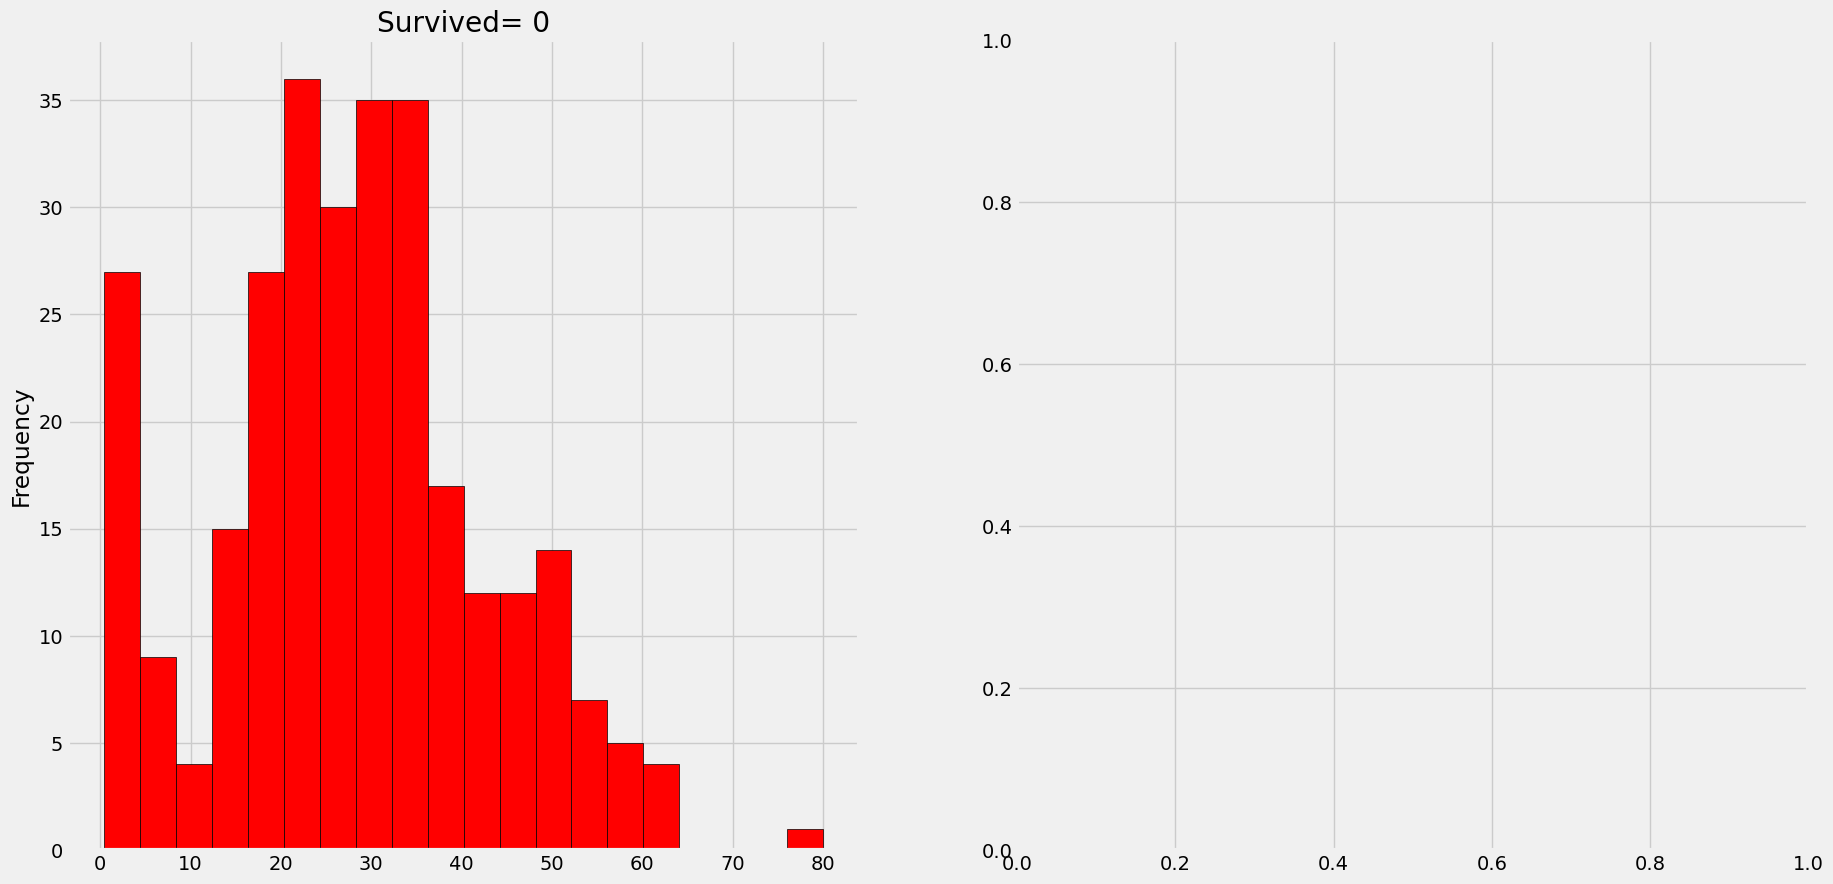

In [10]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==1].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')

## Correlation

In [11]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [12]:
data.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [13]:
### Now let's prepare lists of numeric and categorical columns
# Numeric Features
numeric_features = ['Age', 'Fare']
# Categorical Features
ordinal_features = ['Pclass', 'SibSp', 'Parch']
nominal_features = ['Sex', 'Embarked']


In [14]:
train_data = data.copy()

In [15]:
train_data['target_name'] = train_data['Survived'].map({0: 'Not Survived', 1: 'Survived'})


In [16]:
train_data['target_name']

0      Not Survived
1          Survived
2          Survived
3          Survived
4      Not Survived
           ...     
886    Not Survived
887        Survived
888    Not Survived
889        Survived
890    Not Survived
Name: target_name, Length: 891, dtype: object

In [17]:
sns.countplot(train_data.target_name);
plt.xlabel('Survived?');
plt.ylabel('Number of occurrences');
plt.show()

ValueError: could not convert string to float: 'Not Survived'

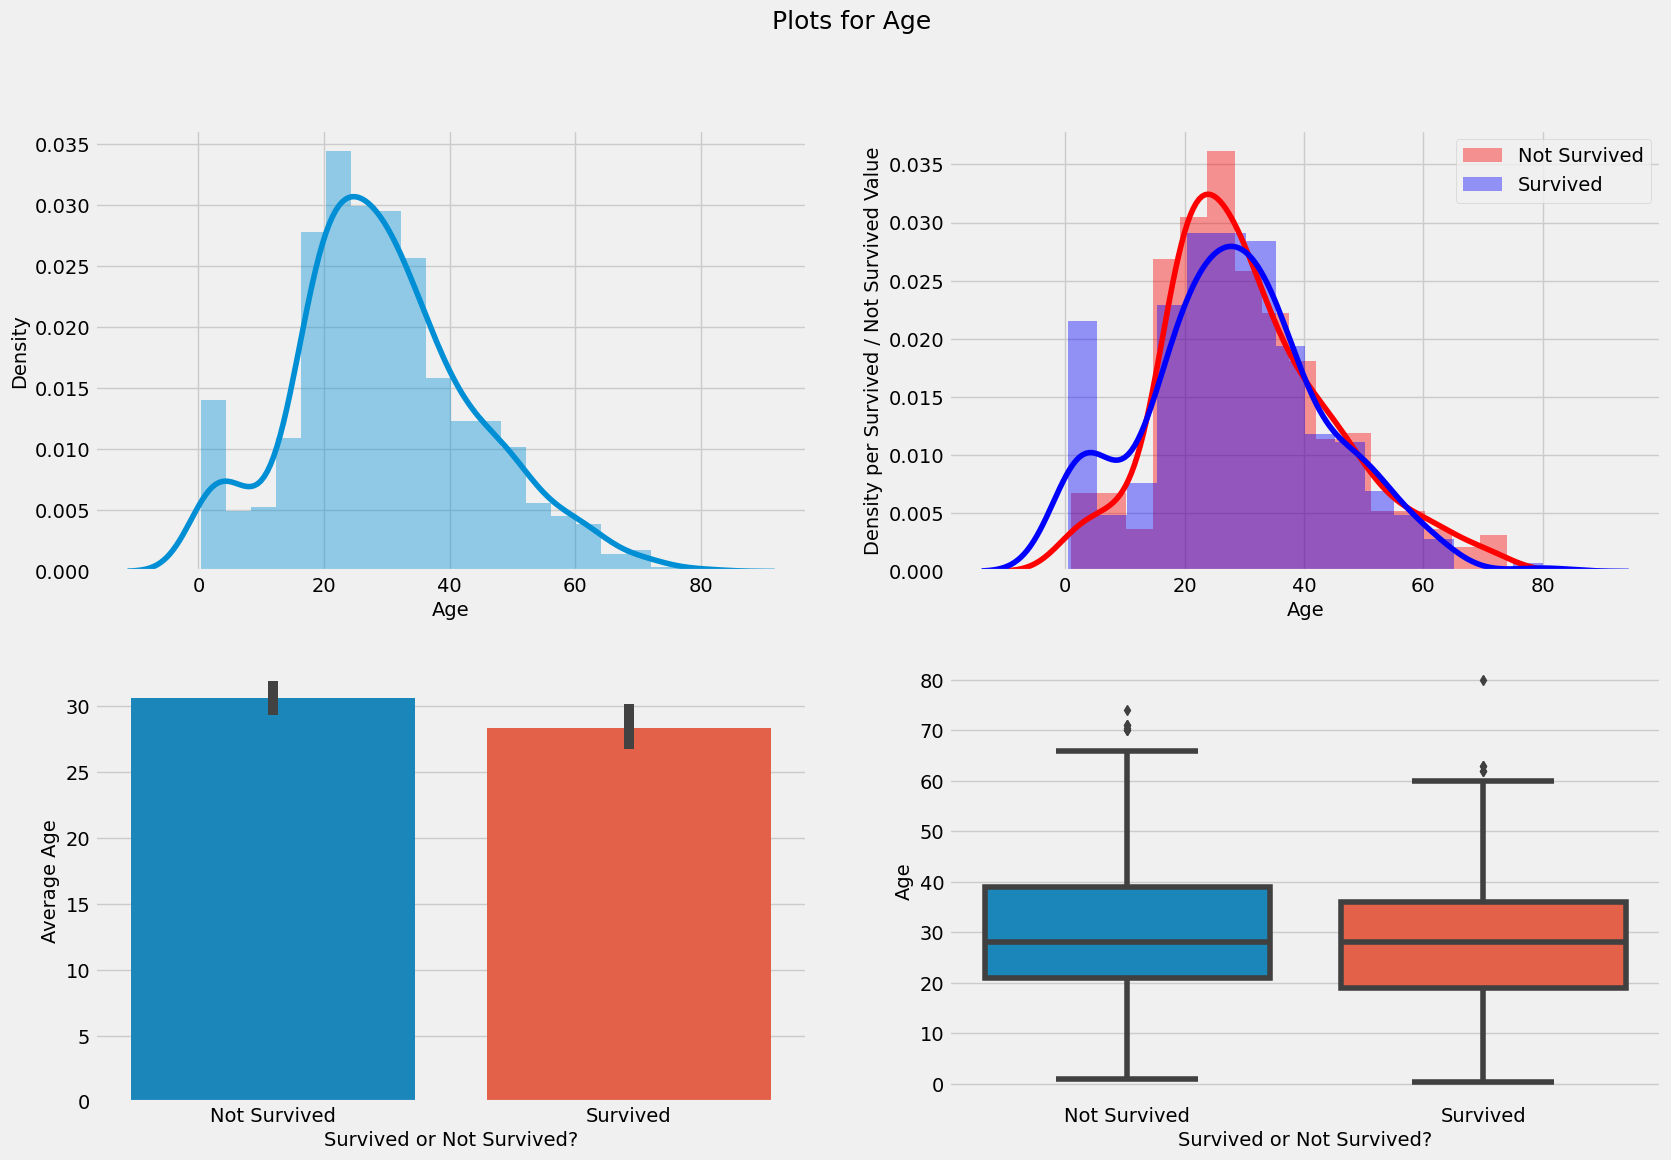

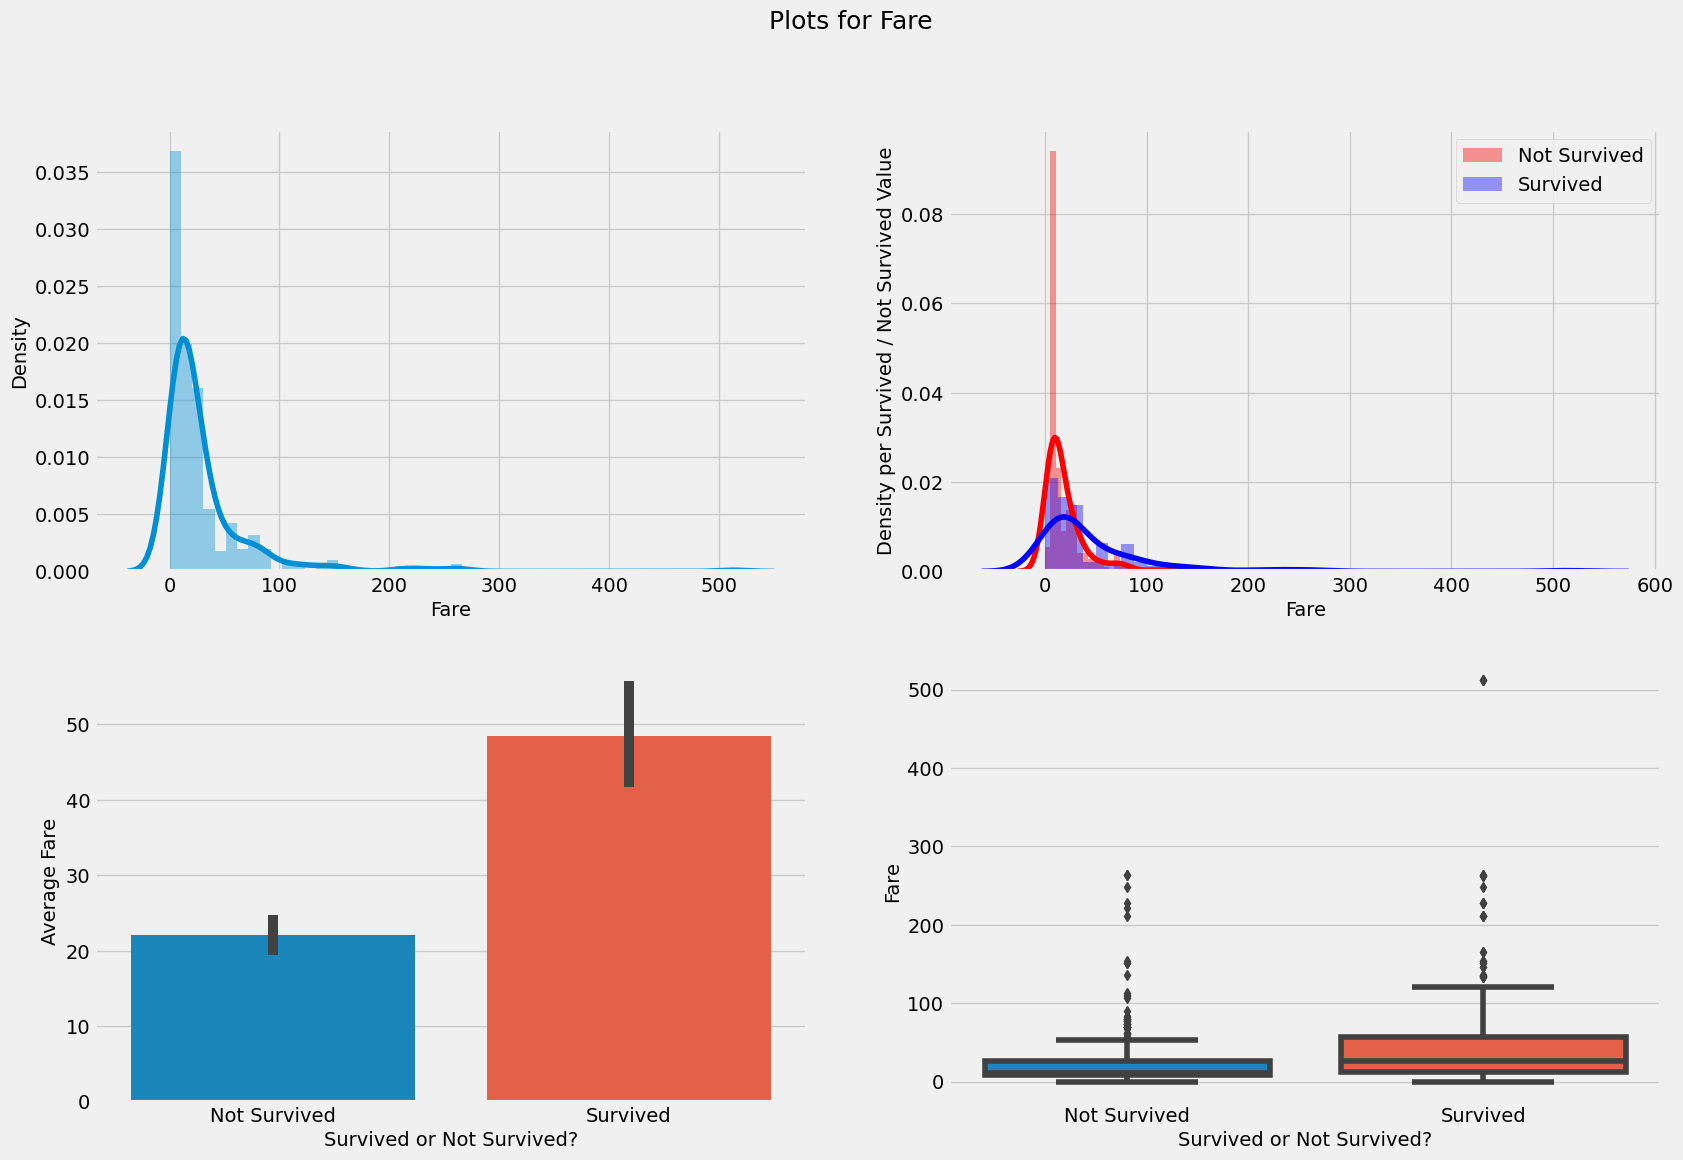

In [18]:
### Plotting Numeric Features
# Looping through and Plotting Numeric features
for column in numeric_features:    
    # Figure initiation
    fig = plt.figure(figsize=(18,12))
    
    ### Distribution plot
    sns.distplot(train_data[column].dropna(), ax=plt.subplot(221));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Density', fontsize=14);
    # Adding Super Title (One for a whole figure)
    plt.suptitle('Plots for '+column, fontsize=18);
    
    ### Distribution per Survived / Not Survived Value
    # Not Survived hist
    sns.distplot(train_data.loc[train_data.Survived==0, column].dropna(),
                 color='red', label='Not Survived', ax=plt.subplot(222));
    # Survived hist
    sns.distplot(train_data.loc[train_data.Survived==1, column].dropna(),
                 color='blue', label='Survived', ax=plt.subplot(222));
    # Adding Legend
    plt.legend(loc='best')
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Density per Survived / Not Survived Value', fontsize=14);
    
    ### Average Column value per Survived / Not Survived Value
    sns.barplot(x="target_name", y=column, data=train_data, ax=plt.subplot(223));
    # X-axis Label
    plt.xlabel('Survived or Not Survived?', fontsize=14);
    # Y-axis Label
    plt.ylabel('Average ' + column, fontsize=14);
    
    ### Boxplot of Column per Survived / Not Survived Value
    sns.boxplot(x="target_name", y=column, data=train_data, ax=plt.subplot(224));
    # X-axis Label
    plt.xlabel('Survived or Not Survived?', fontsize=14);
    # Y-axis Label
    plt.ylabel(column, fontsize=14);
    # Printing Chart
    plt.show()

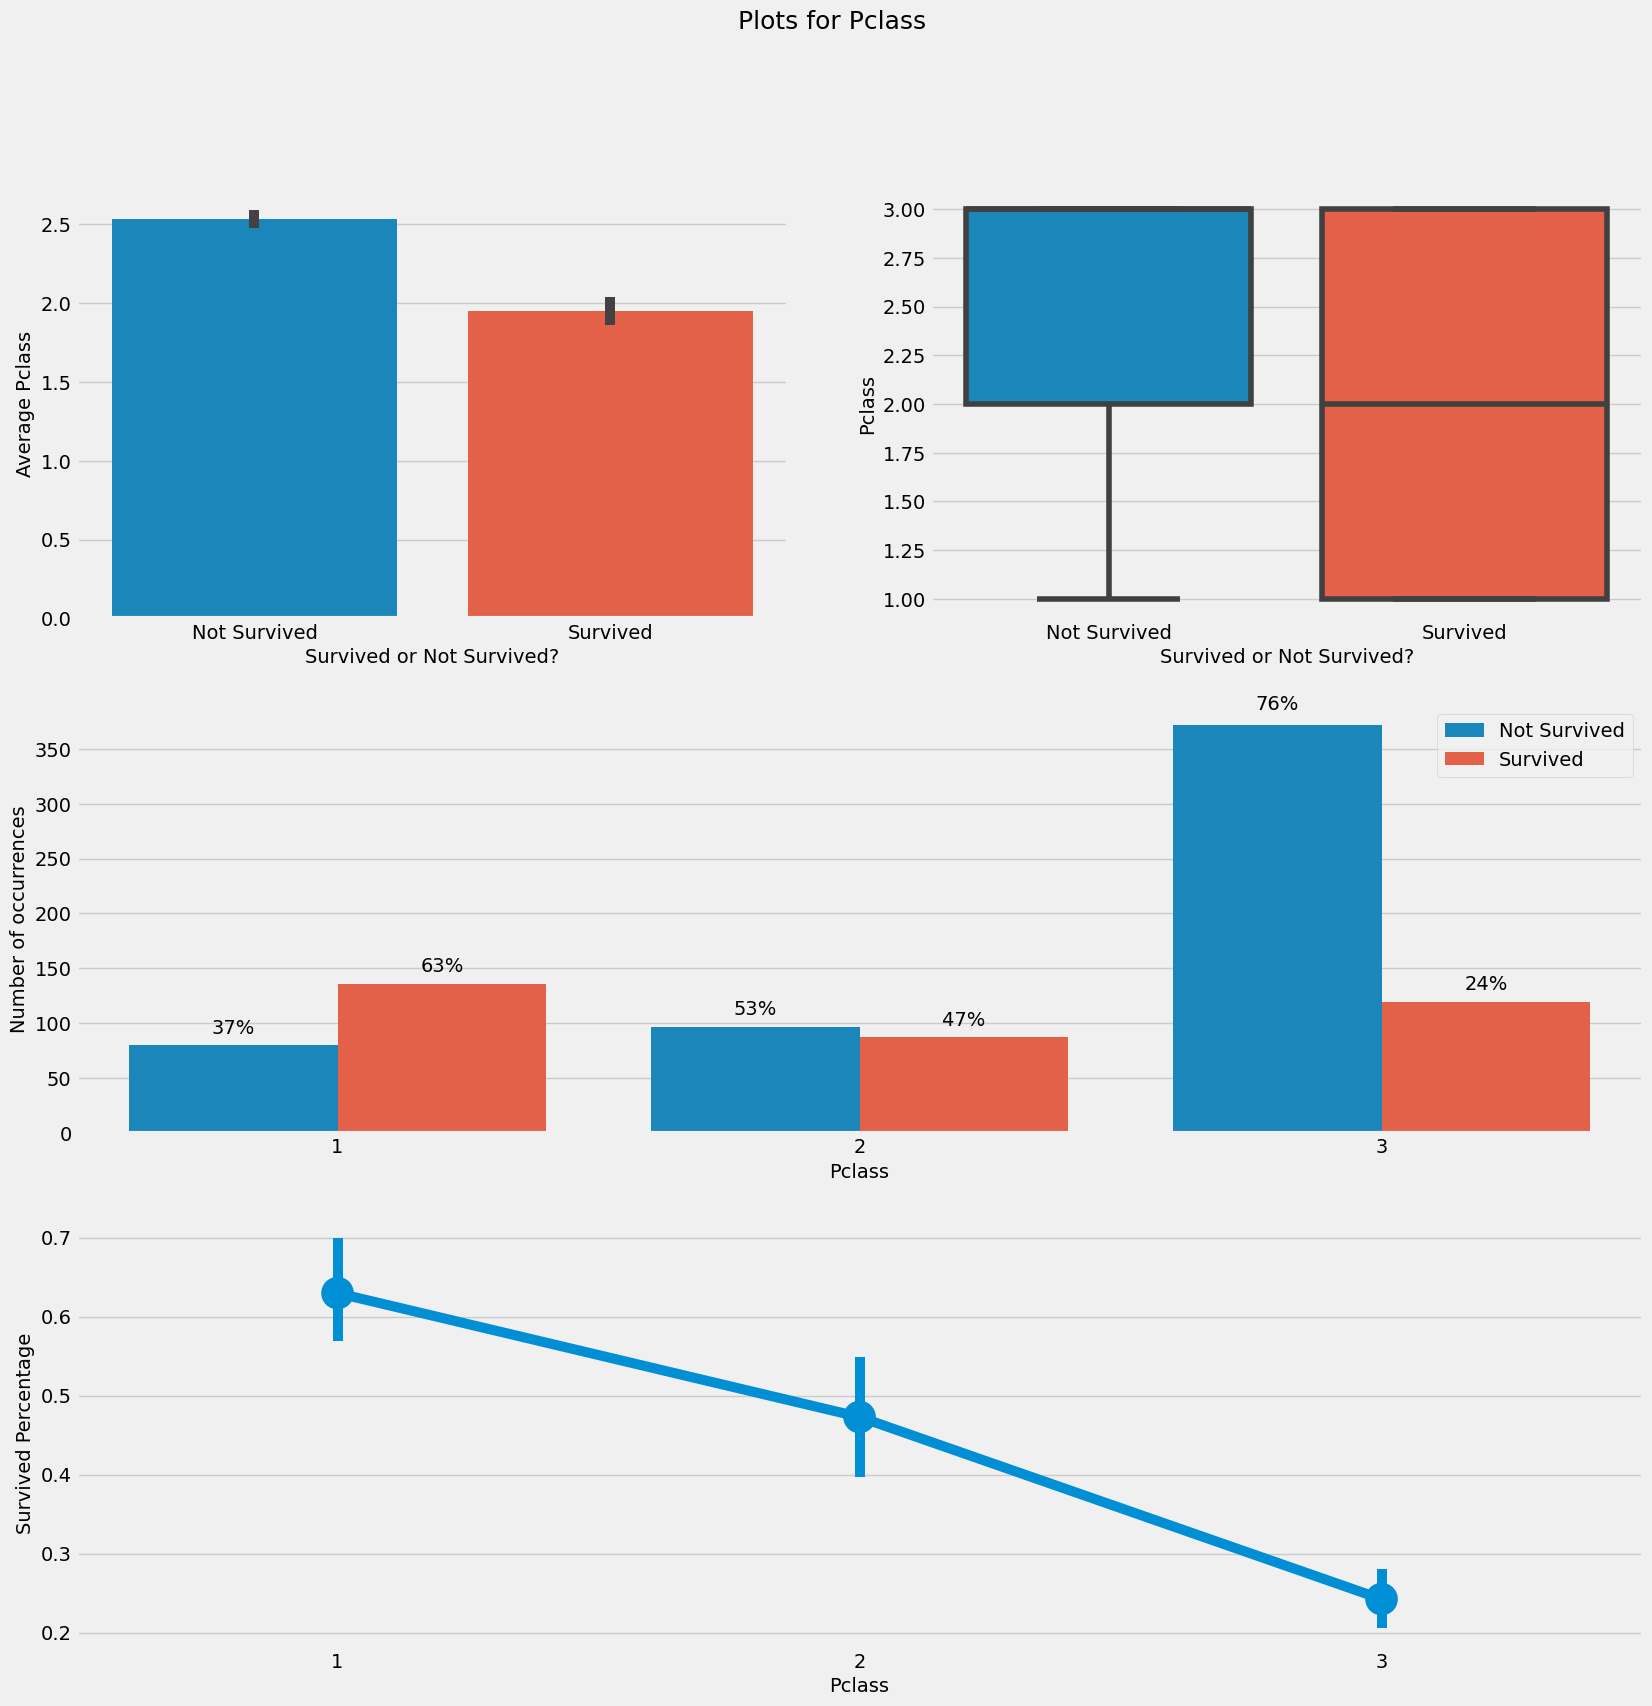

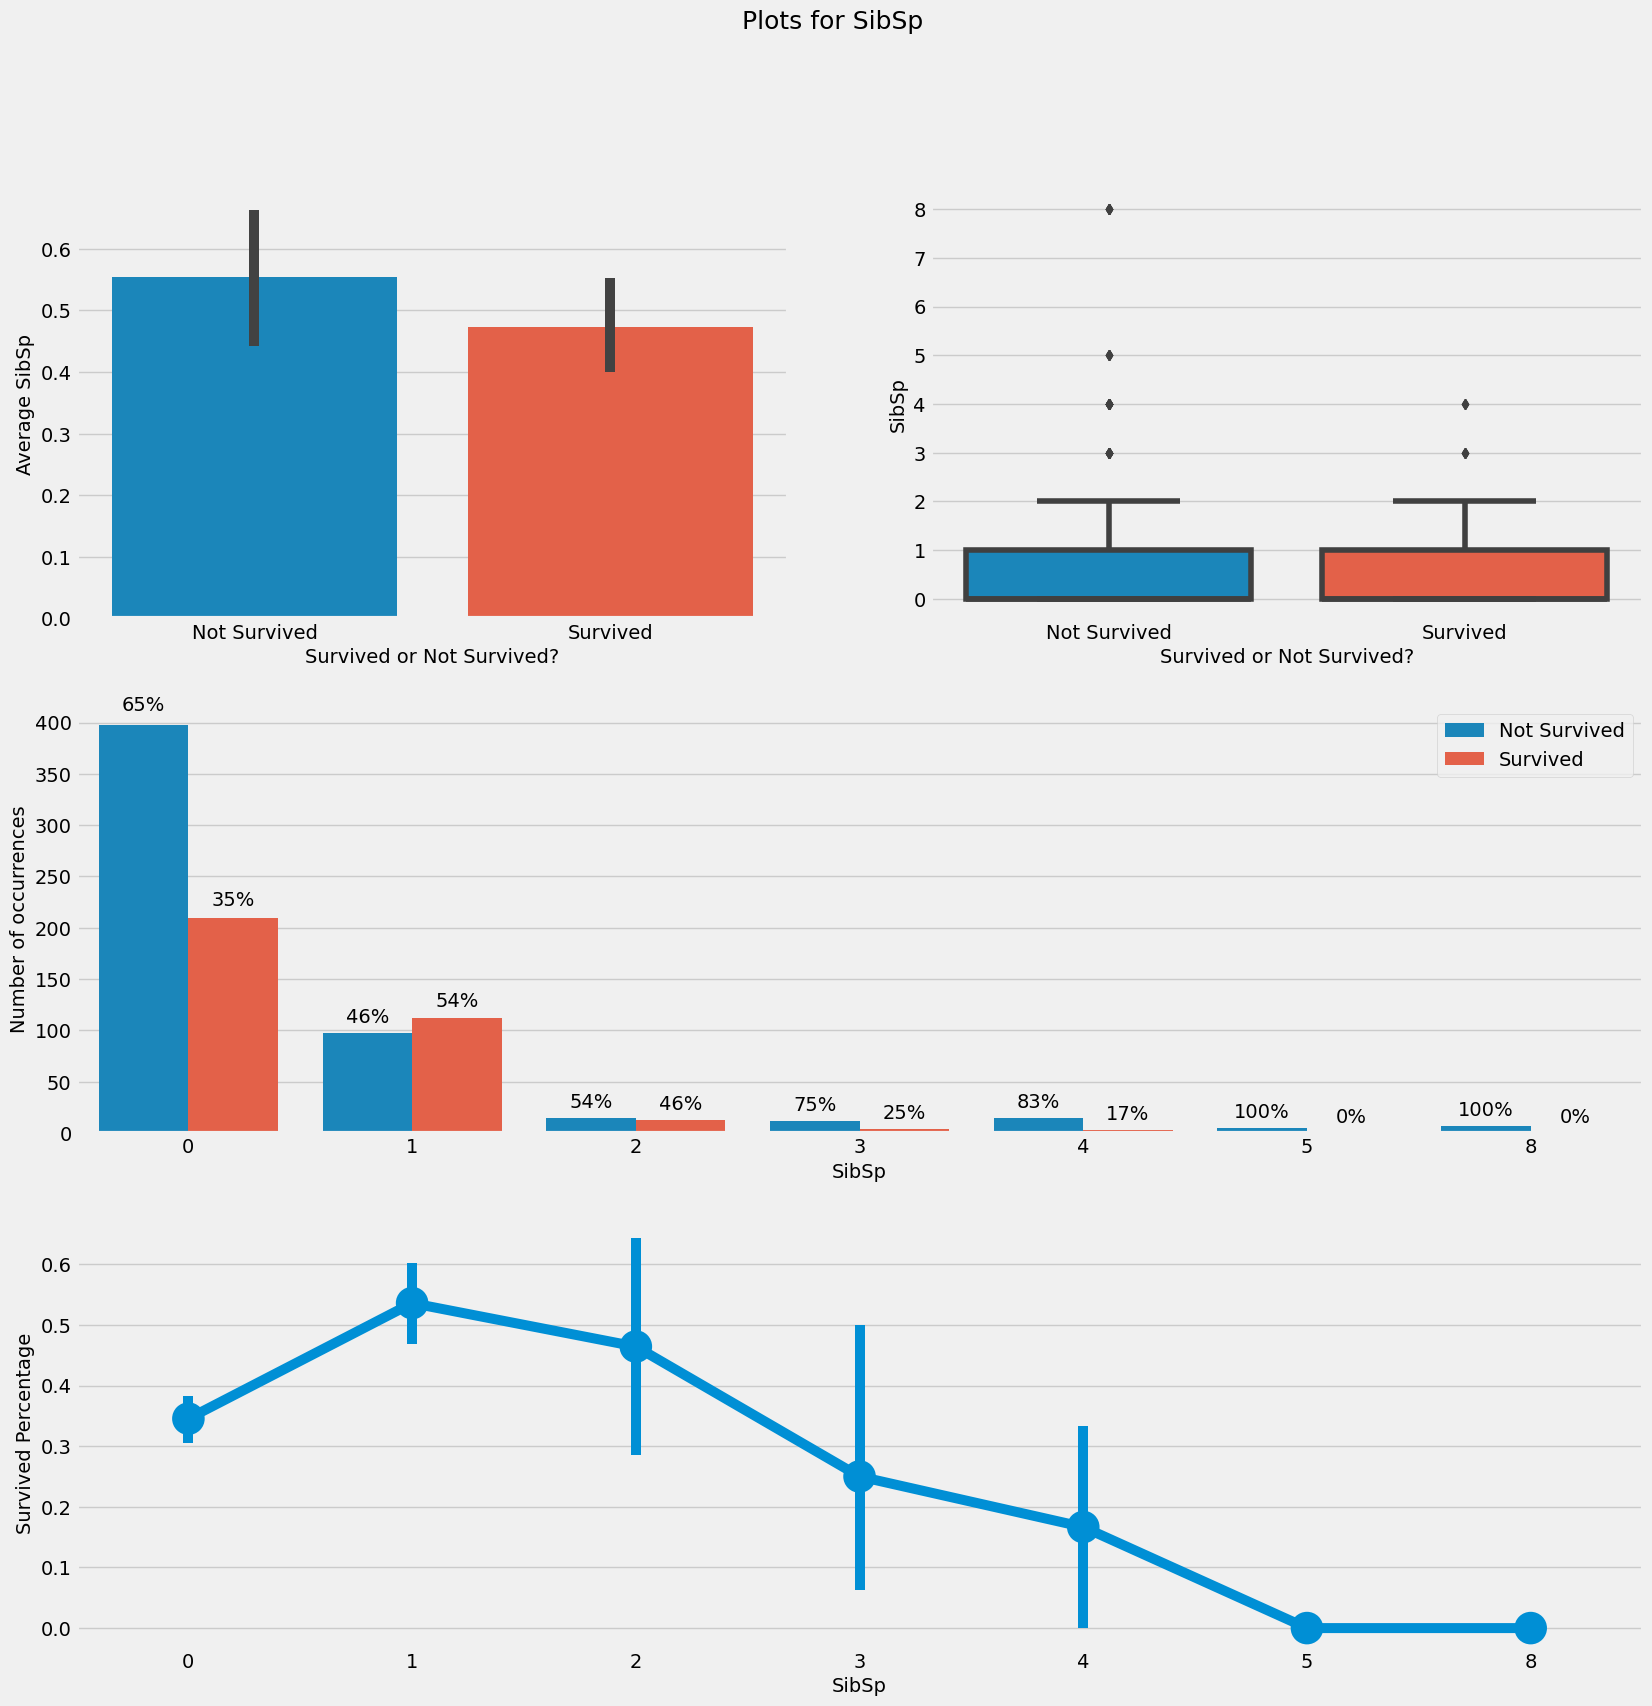

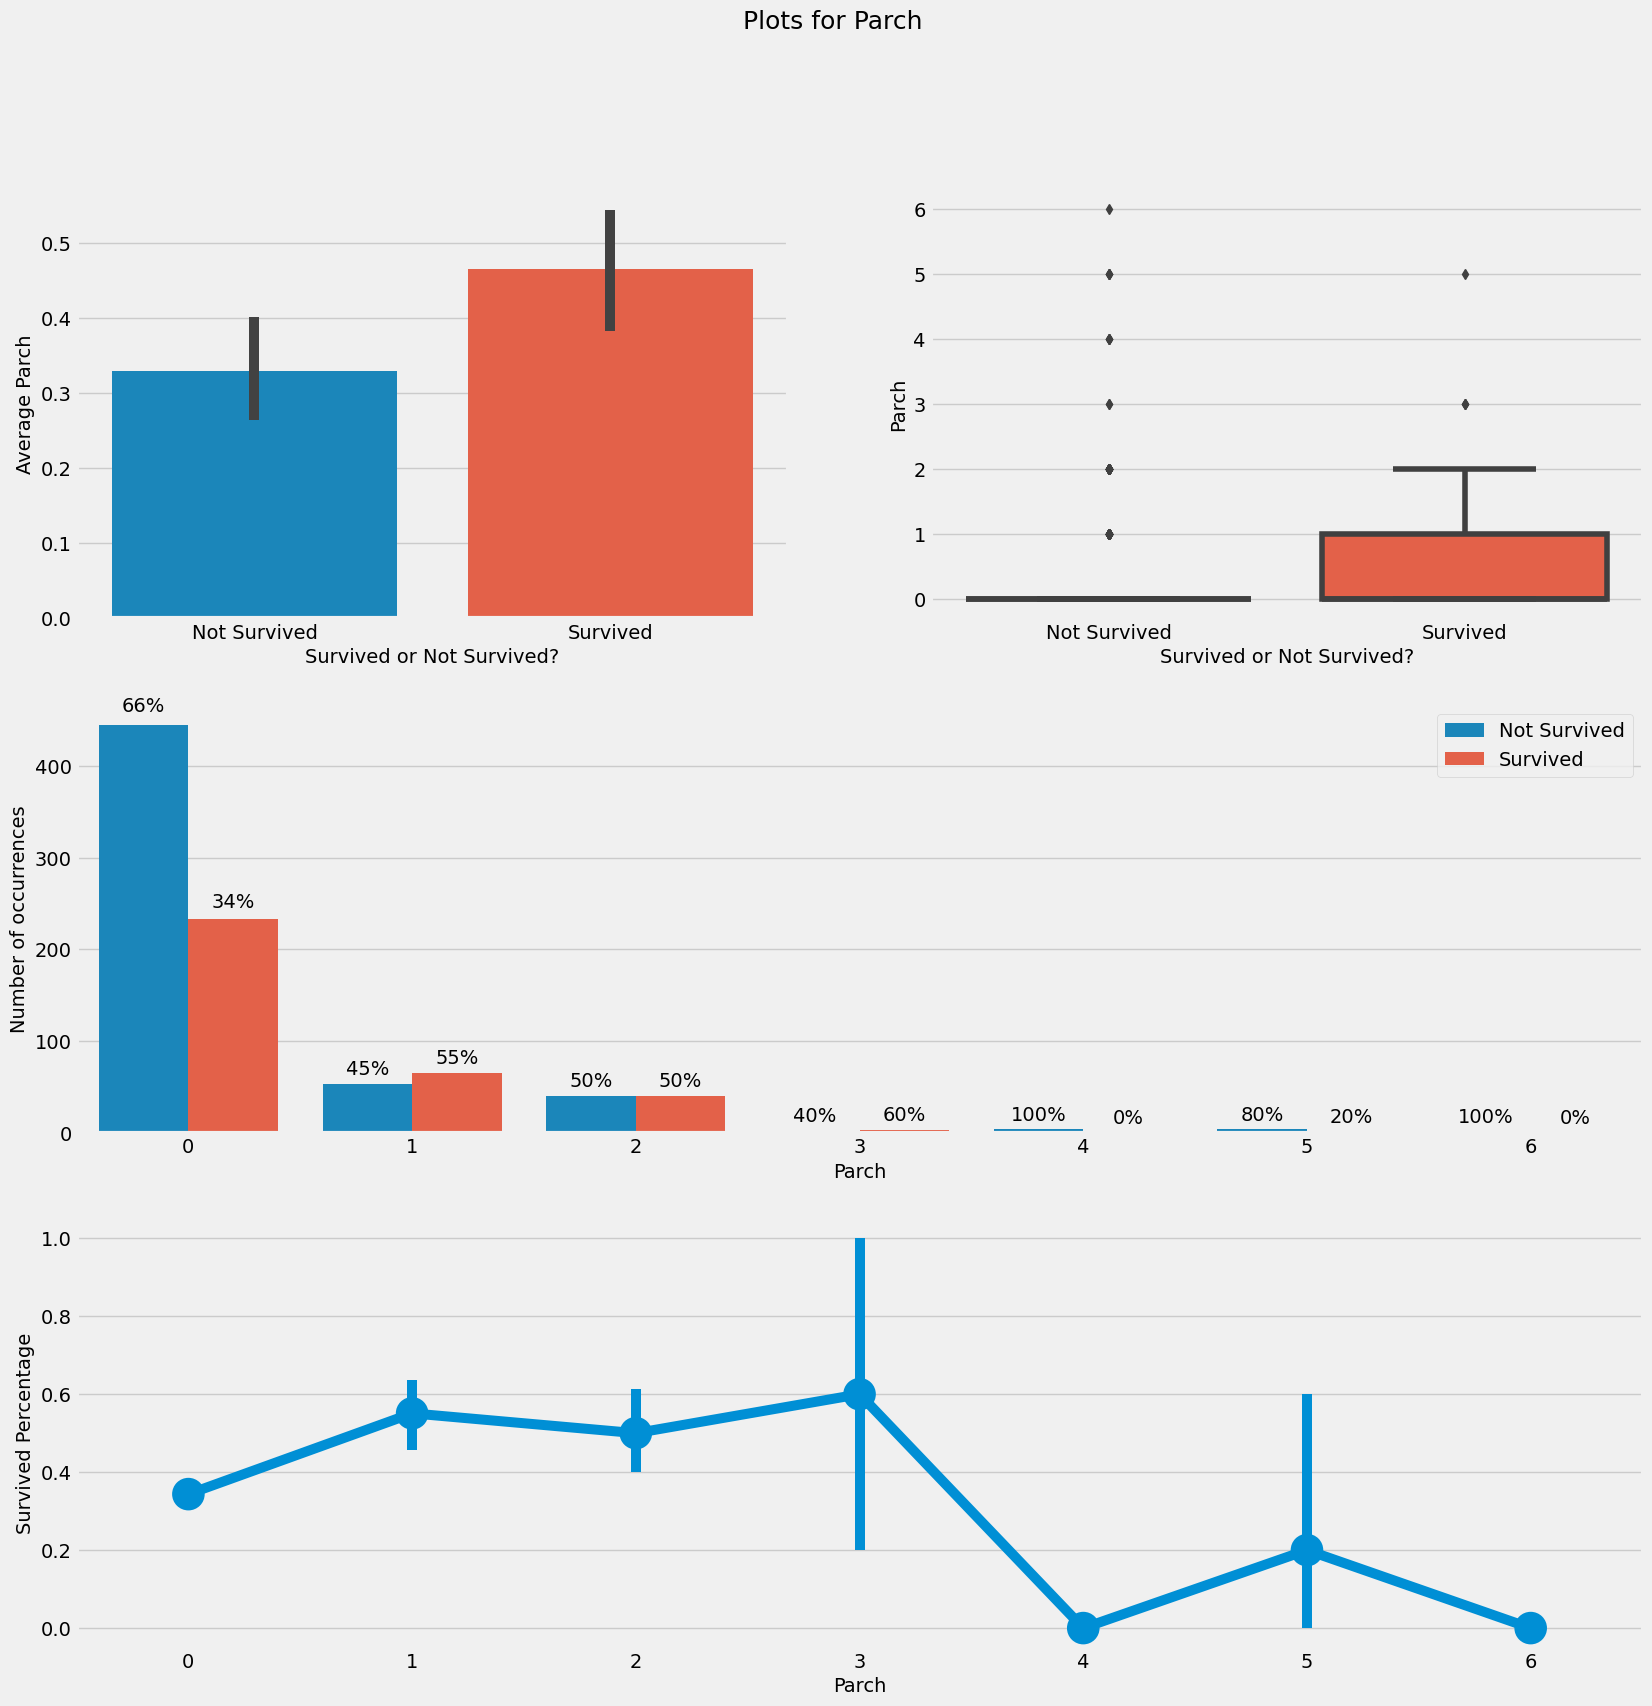

In [19]:
### Plotting Categorical Features
# Looping through and Plotting Categorical features
for column in ordinal_features:
    # Figure initiation
    fig = plt.figure(figsize=(18,18))

    ### Average Column value per Survived / Not Survived Value
    sns.barplot(x="target_name", y=column, data=train_data, ax=plt.subplot(321));
    # X-axis Label
    plt.xlabel('Survived or Not Survived?', fontsize=14);
    # Y-axis Label
    plt.ylabel('Average ' + column, fontsize=14);
    # Adding Super Title (One for a whole figure)
    plt.suptitle('Plots for '+column, fontsize=18);

    ### Boxplot of Column per Survived / Not Survived Value
    sns.boxplot(x="target_name", y=column, data=train_data, ax=plt.subplot(322));
    # X-axis Label
    plt.xlabel('Survived or Not Survived?', fontsize=14);
    # Y-axis Label
    plt.ylabel(column, fontsize=14);

    ### Number of occurrences per categoty - target pair
    ax = sns.countplot(x=column, hue="target_name", data=train_data, ax = plt.subplot(312));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Number of occurrences', fontsize=14);
    # Setting Legend location 
    plt.legend(loc=1);

    ### Adding percents over bars
    # Getting heights of our bars
    height = [p.get_height() if p.get_height()==p.get_height() else 0 for p in ax.patches]
    # Counting number of bar groups 
    ncol = int(len(height)/2)
    # Counting total height of groups
    total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
    # Looping through bars
    for i, p in enumerate(ax.patches):    
        # Adding percentages   
        ax.text(p.get_x()+p.get_width()/2, height[i]*1.01 + 10,
                '{:1.0%}'.format(height[i]/total[i]), ha="center", size=14) 

    ### Survived percentage for every value of feature
    sns.pointplot(x=column, y='Survived', data=train_data, ax = plt.subplot(313));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Survived Percentage', fontsize=14);
    # Printing Chart
    plt.show()
